# Project 03
    - chaining

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
Load the dataset and view the head.

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep = '\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Use shape to determine the size of the dataset. 

In [3]:
print(diamonds.shape)

(53940, 10)


Use describe to view the distribution of the columns in diamonds.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
The 5 most expensive diamonds in the dataset are viewed using filtering and sort commands. 

In [5]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']]\
    .sort_values('price', ascending = False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


The 5 least expensive diamonds in the dataset are viewed using filtering and sort commands. 

In [6]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']]\
    .sort_values('price', ascending = True).head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


The 5 largest diamonds in the dataset with an ideal cut are viewed using filtering and sort commands.

In [7]:
diamonds.loc[diamonds.cut == 'Ideal' , ['price', 'carat', 'cut', 'color', 'clarity']]\
    .sort_values('carat', ascending = False)\
    .head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


The 5 largest diamonds in the dataset with a fair cut are viewed using filtering and sort commands.

In [8]:
diamonds.loc[diamonds.cut == 'Fair' , ['price', 'carat', 'cut', 'color', 'clarity']]\
    .sort_values('carat', ascending = False)\
    .head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
Three ordered lists are created for creation of the categorical variable levels.

In [9]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

The categorical level lists are used to replace the former values of the three categorical variables. 

In [10]:
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)

Three color lists are created to represent the categorical variable levels for future plots.

In [11]:
clarity_pal = ['red', 'gray', 'orange', 'green', 'purple', 'brown', 'blue', 'pink']
cut_pal = ['red', 'blue', 'orange', 'green', 'pink']
color_pal = ['red', 'blue', 'orange', 'green', 'purple', 'brown', 'pink']

## Part 4: Displaying Counts for Categorical Variables
The number of diamonds in each level of cut is determined.

In [12]:
diamonds.cut.value_counts().sort_index()

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

The number of diamonds in each level of color is determined.

In [13]:
diamonds.color.value_counts().sort_index()

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64

The number of diamonds in each level of clarity is determined.

In [14]:
diamonds.clarity.value_counts().sort_index()

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: count, dtype: int64

## Part 5: Scatterplots of Price Against Carat
Scatterplots of price versus carat as a group, colored by level and by subplot are created.

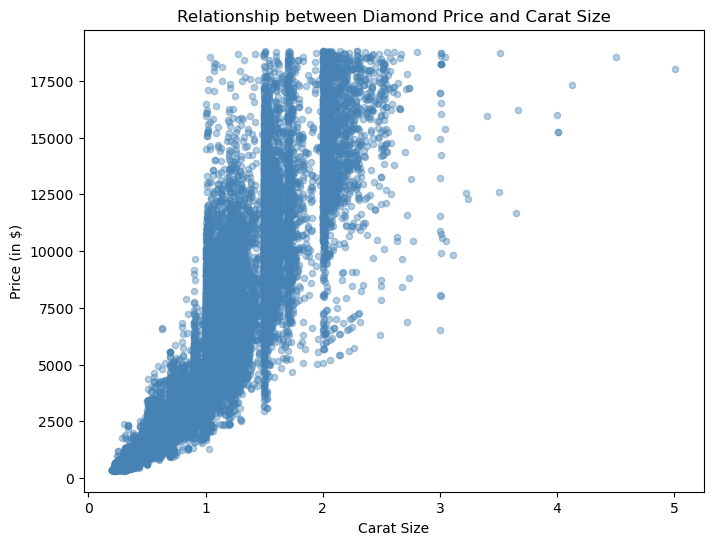

In [15]:
plt.figure(figsize = [8, 6])
plt.scatter(diamonds.carat, diamonds.price, s = 20, alpha = 0.4, color = 'steelblue')
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()

A scatterplot as above but colored by clarity level is created.

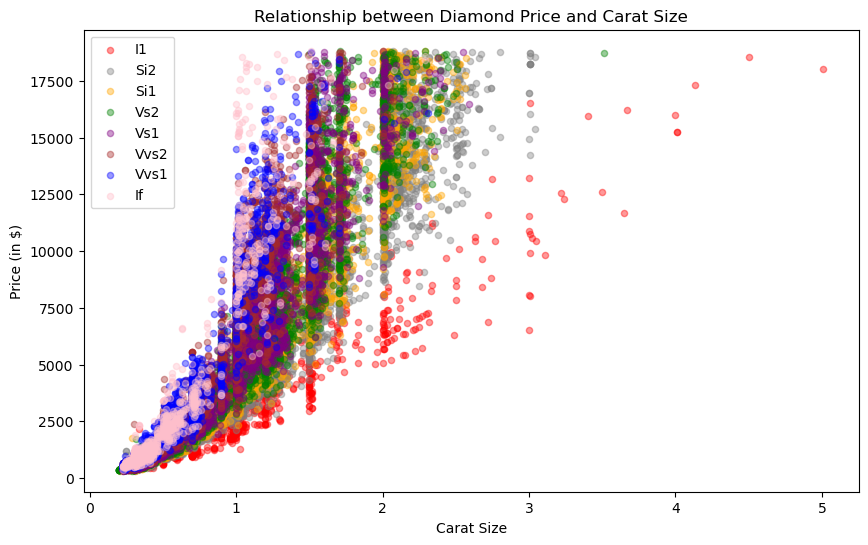

In [16]:
plt.figure(figsize = [10,6])
for i, clarity in enumerate(clarity_levels):
    plt.scatter(diamonds.loc[diamonds.clarity == clarity, 'carat'],
                diamonds.loc[diamonds.clarity == clarity, 'price'],\
                s = 20, alpha = 0.4, color = clarity_pal[i], label=clarity.title())
plt.legend()
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()

Scatterplots as above but colored and divided into subplots by clarity level are created.

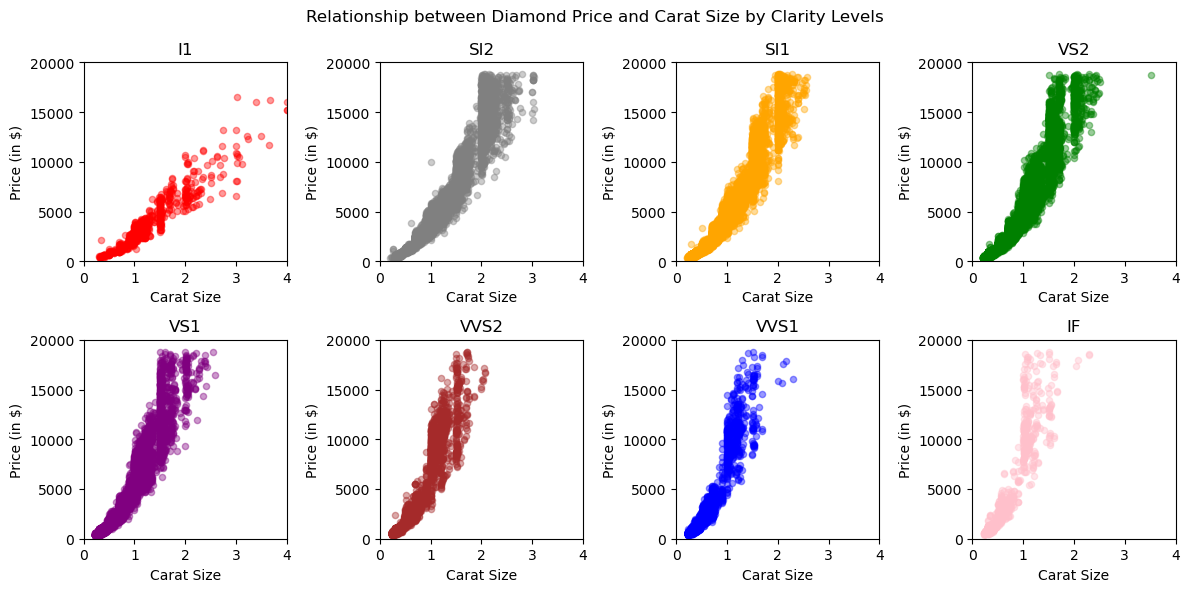

In [17]:
plt.figure(figsize = [12, 6])
for i, clarity in enumerate(clarity_levels):
    plt.subplot(2, 4, i + 1) #i = 0 so must add 1
    plt.scatter(diamonds.loc[diamonds.clarity == clarity, 'carat'],
               diamonds.loc[diamonds.clarity == clarity, 'price'], 
               s=20, alpha=0.4, color = clarity_pal[i])
    plt.xlim([0, 4])
    plt.ylim([0, 20000])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title(clarity)
plt.suptitle('Relationship between Diamond Price and Carat Size by Clarity Levels')
plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations
Two columns are added to the dataframe to store the new transformed data.

In [18]:
diamonds.loc[: , ['ln_carat']] = np.log(diamonds.carat)
diamonds.loc[: , ['ln_price']] = np.log(diamonds.price)

Histograms of the price and natural log of the price are created to view the distributions.

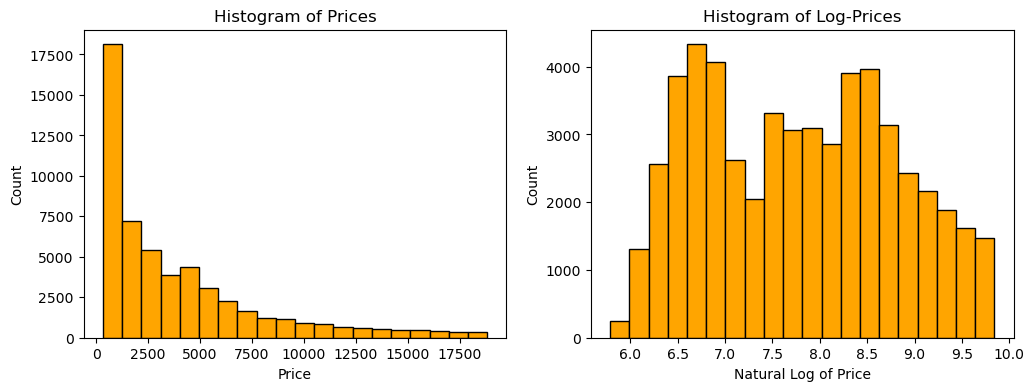

In [19]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.hist(diamonds.loc[ : , 'price'], edgecolor = 'black', color = 'orange', bins = 20)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(diamonds.loc[ : , 'ln_price'], edgecolor = 'black', color =  'orange', bins = 20)
plt.title('Histogram of Log-Prices')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')

#plt.tight_layout()
plt.show()

Histograms of the carat sizes and natural log of the carate sizes are created to view the distributions.

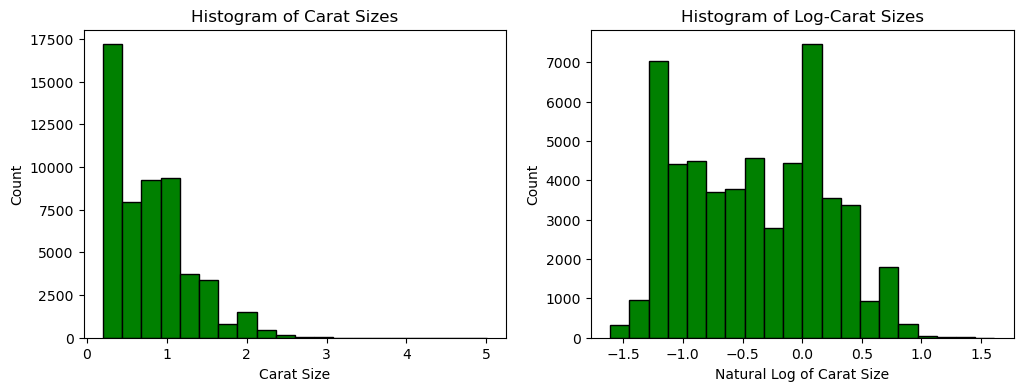

In [20]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.hist(diamonds.loc[ : , 'carat'], edgecolor = 'black', color = 'green', bins = 20)
plt.title('Histogram of Carat Sizes')
plt.xlabel('Carat Size')
plt.ylabel('Count')
plt.title('Histogram of Carat Sizes')

plt.subplot(1, 2, 2)
plt.hist(diamonds.loc[ : , 'ln_carat'], edgecolor = 'black', color = 'green', bins = 20)
plt.title('Histogram of Log-Carat Sizes')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')

plt.show()

## Part 7: Scatterplot of Transformed Variables
A scatterplot of log price versus log carat and colored by clarity level is created.

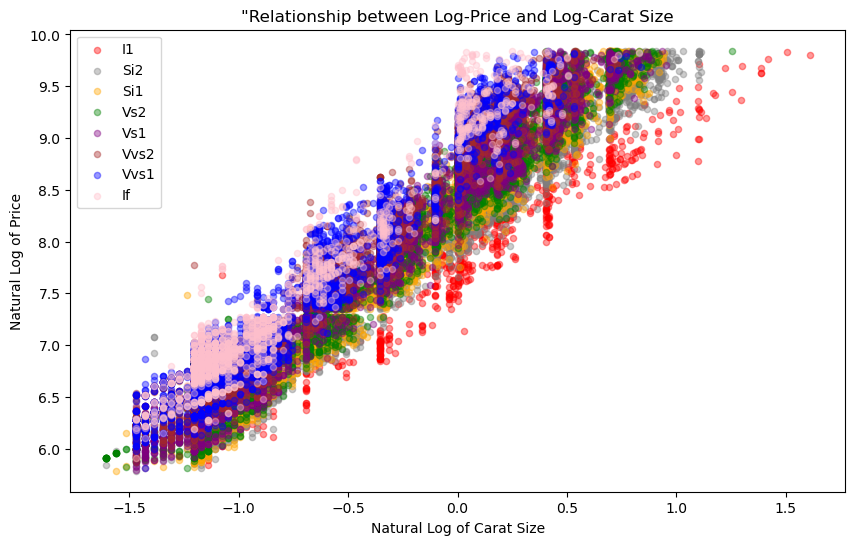

In [21]:
plt.figure(figsize = [10, 6])
for i, clarity in enumerate(clarity_levels):
    plt.scatter(diamonds.loc[diamonds.clarity == clarity, 'ln_carat'],
               diamonds.loc[diamonds.clarity == clarity, 'ln_price'],
               s = 20, alpha = 0.4, color = clarity_pal[i], label = clarity.title())
plt.legend()
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('"Relationship between Log-Price and Log-Carat Size')
plt.show()

## Part 8: Grouping by Cut
A new dataframe composed of the means of price and carat, grouped by cut level, is created.

In [22]:
gb_cut = pd.DataFrame(diamonds.loc[ : , ['cut', 'price', 'carat']]).groupby('cut').mean()
(gb_cut)

C:\Users\mmsax\AppData\Local\Temp\ipykernel_54804\3497776743.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_cut = pd.DataFrame(diamonds.loc[ : , ['cut', 'price', 'carat']]).groupby('cut').mean()


,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


Barcharts of the preceding dataframe are created.

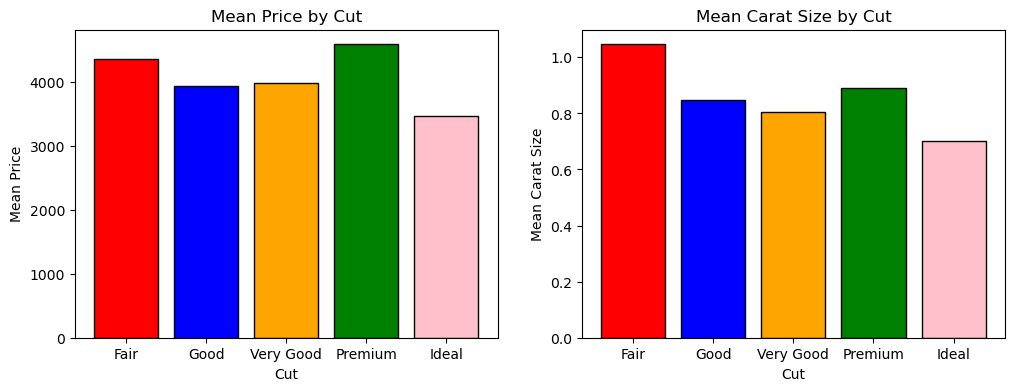

In [23]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.bar(gb_cut.index, gb_cut['price'], 
       edgecolor = 'black', color = cut_pal)
plt.title('Mean Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(gb_cut.index, gb_cut['carat'],
       edgecolor = 'black', color = cut_pal)
plt.title('Mean Carat Size by Cut')
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')

plt.show()

## Part 9: Grouping by Color
A new dataframe composed of the means of price and carat, grouped by color level, is created.

In [24]:
gb_color = pd.DataFrame(diamonds.loc[ : , ['color', 'price', 'carat']]).groupby('color').mean()
(gb_color)

C:\Users\mmsax\AppData\Local\Temp\ipykernel_54804\1527407772.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_color = pd.DataFrame(diamonds.loc[ : , ['color', 'price', 'carat']]).groupby('color').mean()


,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


Barcharts of the preceding dataframe are created.

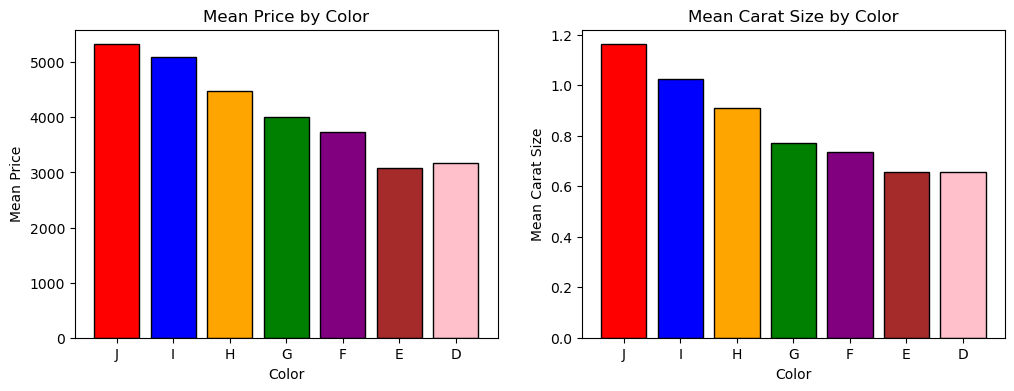

In [25]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.bar(gb_color.index, gb_color['price'], 
       edgecolor = 'black', color = color_pal)
plt.title('Mean Price by Color')
plt.xlabel('Color')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(gb_color.index, gb_color['carat'],
       edgecolor = 'black', color = color_pal)
plt.title('Mean Carat Size by Color')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')

plt.show()

## Part 10: Grouping by Clarity
A new dataframe composed of the means of price and carat, grouped by clarity level, is created.

In [26]:
gb_clarity = pd.DataFrame(diamonds.loc[ : , ['clarity', 'price', 'carat']]).groupby('clarity').mean()
(gb_clarity)

C:\Users\mmsax\AppData\Local\Temp\ipykernel_54804\974687634.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_clarity = pd.DataFrame(diamonds.loc[ : , ['clarity', 'price', 'carat']]).groupby('clarity').mean()


,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


Barcharts of the preceding dataframe are created.

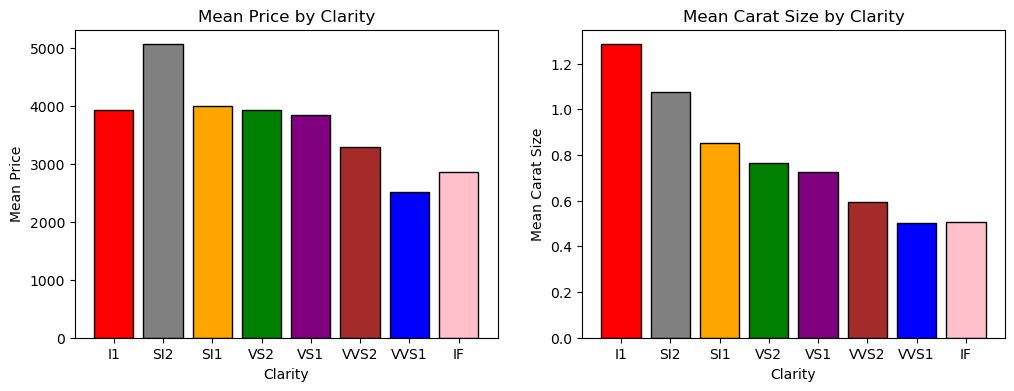

In [27]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.bar(gb_clarity.index, gb_clarity['price'], 
       edgecolor = 'black', color = clarity_pal)
plt.title('Mean Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(gb_clarity.index, gb_clarity['carat'],
       edgecolor = 'black', color = clarity_pal)
plt.title('Mean Carat Size by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')

plt.show()